## Import libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [3]:
df = pd.read_csv("winemag-data_first150k.csv") 
del df['Unnamed: 0']
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


## What are the biggest producers of wine?

Let´s see first how many values are missing in the country column

In [12]:
df['country'].isnull().sum()

5

Only 5 values (0.003 %) are missing. Let´s see which are the lines where the country is not defined.

In [11]:
df[df['country'].isnull()]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1133,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Red Blend,Büyülübağ
68226,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
113016,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
135696,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas


No obvisous reason why the country is not defined. We don´t loose information supressing the rows where the country is not defined.

In [15]:
df = df.dropna(subset=['country'])

We check that the rows have been supressed

In [16]:
df['country'].isnull().sum()

0

Now let´s group the data by country and let´s see the number of wine for each country.

Text(0, 0.5, 'Percentage of production')

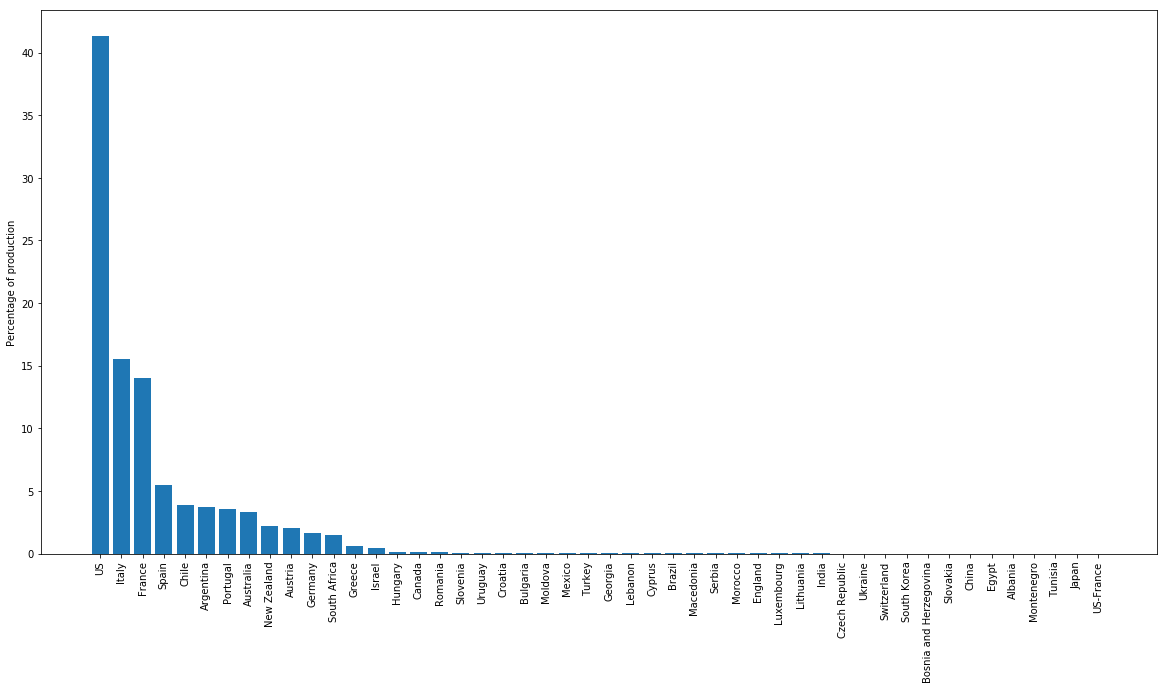

In [49]:
country_wines_n = df['country'].value_counts()
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
ax.bar(country_wines_n.index, country_wines_n.values/df.shape[0]*100)
plt.setp(ax.get_xticklabels(), rotation=90);# country_wines_n/df.shape[0]
ax.set_ylabel('Percentage of production')

In [50]:
country_wines_n

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

## Conclusion

We see 3 main producers which are US, Italy and France producing more than 10%. <br/>
We have medium producers which are Spain, Chile, Argentina, Portugal, Austria, Germany and South Africaproducing more than 1%.